# Assignment overview <ignore>
The overarching goal of this assignment is to produce a research report in which you implement, analyse, and discuss various Neural Network techniques. You will be guided through the process of producing this report, which will provide you with experience in report writing that will be useful in any research project you might be involved in later in life.

All of your report, including code and Markdown/text, ***must*** be written up in ***this*** notebook. This is not typical for research, but is solely for the purpose of this assignment. Please make sure you change the title of this file so that XXXXXX is replaced by your candidate number. You can use code cells to write code to implement, train, test, and analyse your NNs, as well as to generate figures to plot data and the results of your experiments. You can use Markdown/text cells to describe and discuss the modelling choices you make, the methods you use, and the experiments you conduct. So that we can mark your reports with greater consistency, please ***do not***:

* rearrange the sequence of cells in this notebook.
* delete any cells, including the ones explaining what you need to do.

If you want to add more code cells, for example to help organise the figures you want to show, then please add them directly after the code cells that have already been provided.

Please provide verbose comments throughout your code so that it is easy for us to interpret what you are attempting to achieve with your code. Long comments are useful at the beginning of a block of code. Short comments, e.g. to explain the purpose of a new variable, or one of several steps in some analyses, are useful on every few lines of code, if not on every line. Please do not use the code cells for writing extensive sentences/paragraphs that should instead be in the Markdown/text cells.

# Abstract/Introduction (instructions) - 15 MARKS <ignore>
Use the next Markdown/text cell to write a short introduction to your report. This should include:
* a brief description of the topic (image classification) and of the dataset being used (CIFAR10 dataset). (2 MARKS)
* a brief description of how the CIFAR10 dataset has aided the development of neural network techniques, with examples. (3 MARKS)
* a descriptive overview of what the goal of your report is, including what you investigated. (5 MARKS)
* a summary of your major findings. (3 MARKS)
* two or more relevant references. (2 MARKS)

The concept of Artificial Neural Network (ANN) is a popular topic in the field of artificial intelligence since the 1980s [1]. ANNs are inspired by the principles of sensory processing in the brain and are created by simulating a network of model neurons in a computer. These networks use algorithms that simulate the processes of real neurons for the computer to “learn” to solve various problems [2]. An ANN consists of three different layers. The input layer receives data and sends it to the hidden layer where it is processed and then passed to the output layer, which provides the final output [3]. Each connection between neurons are represented with weights and additional parameter known as bias, allowing neurons to independently adjust their outputs regardless of their inputs [1], as illustrated in Figure 1.

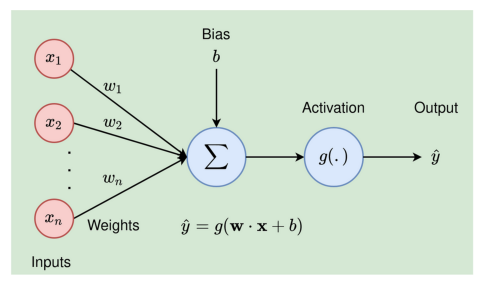

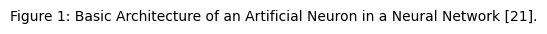

In [ ]:
import matplotlib.pyplot as plt
# Read in the image
im=plt.imread('ANNBasic.png')
# Setup a figure
figureSize = 6
fig = plt.figure(figsize=[figureSize, figureSize])
# Show the image in the figure and remove axes.
plt.imshow(im); plt.axis('off'); plt.show();
# Setup a new figure for the caption.
fig = plt.figure(figsize=[0.01,0.01]); plt.axis('off');
# Write the caption here
captionText = 'Figure 1: Basic Architecture of an Artificial Neuron in a Neural Network [21].'
# Show the caption text.
plt.figtext(0.1, 0.1, captionText); plt.show()

Convolutional Neural Networks (CNN) are used for image classification to execute complex algorithms and data to emulate human recognition. CNNs are primarily used at finding patterns and classifying images, making them popular in image classification and recognition tasks based on the pixel size of images in the network [4,5]. CNNs adaptively learn spatial hierarchies of image features through backpropagation by using different layers called convolution layers, pooling layers, and fully connected layers [6], as depicted in Figure 2.

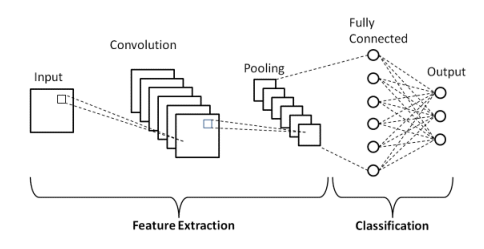

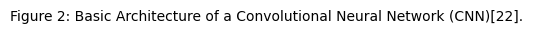

In [ ]:
import matplotlib.pyplot as plt
# Read in the image
im=plt.imread('CNNBasic.png')
# Setup a figure
figureSize = 6
fig = plt.figure(figsize=[figureSize, figureSize])
# Show the image in the figure and remove axes.
plt.imshow(im); plt.axis('off'); plt.show();
# Setup a new figure for the caption.
fig = plt.figure(figsize=[0.01,0.01]); plt.axis('off');
# Write the caption here
captionText = 'Figure 2: Basic Architecture of a Convolutional Neural Network (CNN)[22].'
# Show the caption text.
plt.figtext(0.1, 0.1, captionText); plt.show()

The CIFAR-10 dataset, as shown in Figure 3, used in this project is a multi-class image dataset consisting of 50,000 training and 10,000 testing images, total of 60,000 32×32 images across 10 classes, with each class having 6,000 images [7]. CIFAR-10 is a popular machine learning dataset frequently used to test and develop neural network models in computer vision tasks like image recognition [8].

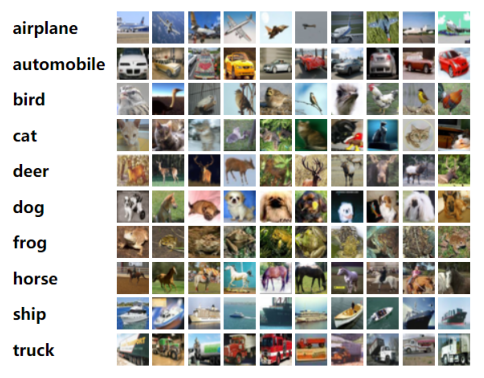

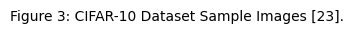

In [ ]:
import matplotlib.pyplot as plt
# Read in the image
im=plt.imread('CIFARBasic.png')
# Setup a figure
figureSize = 6
fig = plt.figure(figsize=[figureSize, figureSize])
# Show the image in the figure and remove axes.
plt.imshow(im); plt.axis('off'); plt.show();
# Setup a new figure for the caption.
fig = plt.figure(figsize=[0.01,0.01]); plt.axis('off');
# Write the caption here
captionText = 'Figure 3: CIFAR-10 Dataset Sample Images [23].'
# Show the caption text.
plt.figtext(0.1, 0.1, captionText); plt.show()

To implement this project, a base CNN model consisting of three convolutional hidden layers and two fully connected layers was created. Using this base model, three experiments were conducted to understand how various processes affect CNN performance. In the first experiment, the performances of different learning rates and the effects of an optimiser scheduler on model accuracy were measured and later compared in terms of generalisability. Increasing the learning rate improved accuracy but widened the generalisation gap, while decreasing it hindered the model’s ability to learn. And adding a scheduler resulted it to generalise better. The second experiment focused on regularisation applying different dropout rates to fully connected layers to assess their impact on model accuracy and generalisability. Additionally, it involved a transfer learning task where the convolutional layers were frozen and fully connected layers re-initialised to investigate how the model performs in a transfer learning task. Adding a dropout rate reduced the generalisation gap but setting it high prevented learning. The first three parts of the experiment 3 that aimed to record and analyse gradients from selected episodes during training. However, due to implementation issues only the part with the batch normalisation was conducted and its effects on accuracy were analysed. Adding batch normalisation to the model increased accuracy and sped up convergence, but also increased the generalisation gap.

# Methodology (instructions) - 55 MARKS <ignore>
Use the next cells in this Methodology section to describe and demonstrate the details of what you did, in practice, for your research. Cite at least two academic papers that support your model choices. The overarching prinicple of writing the Methodology is to ***provide sufficient details for someone to replicate your model and to reproduce your results, without having to resort to your code***. You must include at least these components in the Methodology:
* Data - Decribe the dataset, including how it is divided into training, validation, and test sets. Describe any pre-processing you perform on the data, and explain any advantages or disadvantages to your choice of pre-processing.
* Architecture - Describe the architecture of your model, including all relevant hyperparameters. The architecture must include 3 convolutional layers followed by two fully connected layers. Include a figure with labels to illustrate the architecture.
* Loss function - Describe the loss function(s) you are using, and explain any advantages or disadvantages there are with respect to the classification task.
* Optimiser - Describe the optimiser(s) you are using, including its hyperparameters, and explain any advantages or disadvantages there are to using that optimser.
* Experiments - Describe how you conducted each experiment, including any changes made to the baseline model that has already been described in the other Methodology sections. Explain the methods used for training the model and for assessing its performance on validation/test data.


## Data (7 MARKS) <ignore>

Before downloading the CIFAR-10 dataset using the “torchvision” library, the transformations to be made on both training and testing data were defined. “RandomHorizontalFlip” was applied to the training data for augmentation, which flipped the images randomly with a 50% chance. Data augmentation techniques increase the training dataset size by modifying existing data or generating synthetic ones, providing more samples for training. This increases data diversity, improving generalisation and reducing the risk of overfitting [9]. Then, for both the training and testing datasets, images were converted to tensors, and the pixel values were scaled between values of -1 and 1 using “Normalize”. Data normalisation in image classification scales image data to certain values, making it more distinguishable and improving classification performance [10]. Subsequently, the CIFAR-10 dataset was downloaded with these transformations applied, and data loaders were configured to process the data in batches of 32. Since each experiment had its own objectives, the data for each experiment was split differently. However, “random split” method was used for each split.

## Architecture (17 MARKS) <ignore>

CNNs consist of convolutional, pooling, and fully connected layers. Convolutional layers are used to learn features and patterns from inputs by applying convolution operations with a set of learnable filters (kernels). These filters slide over the input’s spatial dimensions calculating the dot product between the filter and local input regions and produce a 2D activation map that captures features at different spatial positions [11], as visualised in Figure 4.

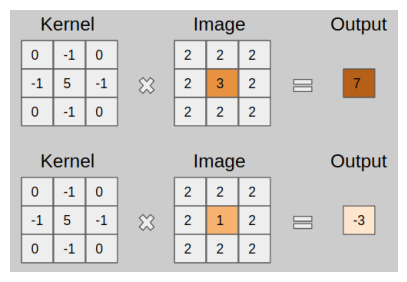

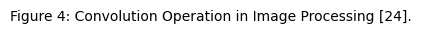

In [ ]:
import matplotlib.pyplot as plt
# Read in the image
im=plt.imread('ConvKernel.png')
# Setup a figure
figureSize = 5
fig = plt.figure(figsize=[figureSize, figureSize])
# Show the image in the figure and remove axes.
plt.imshow(im); plt.axis('off'); plt.show();
# Setup a new figure for the caption.
fig = plt.figure(figsize=[0.01,0.01]); plt.axis('off');
# Write the caption here
captionText = 'Figure 4: Convolution Operation in Image Processing [24].'
# Show the caption text.
plt.figtext(0.1, 0.1, captionText); plt.show()

The pooling layer reduces the resolution of the feature maps and helps achieve shift-invariance by down-sampling the input using max or average pooling. Fully connected layers take and connect all neurons from the previous layer to every neuron, allowing the network to combine features extracted by earlier layers to generate the final output [12]. A CNN architecture with three convolutional layers of 64, 128, and 256 output channels was developed as a base for all experiments, with each layer doubling the original size of 32. Each convolutional layer was followed by a Rectified Linear Unit (ReLU) activation function and a max-pooling layer with a 2 × 2 filter and a stride of 2 to reduce the spatial dimensions of the activation map to 25% of its original size. Activation functions are mathematical equations that process the input of a layer to determine its output to be supplied as the input to the next layer. ReLU, illustrated in Figure 5 including the equation represented, works by passing the input directly if it is positive and setting it to zero if it's negative, introducing non-linearity to the model. This causes not all neurons to activate simultaneously, allowing only a subset of neurons to work at any given time, making it more efficient [13].

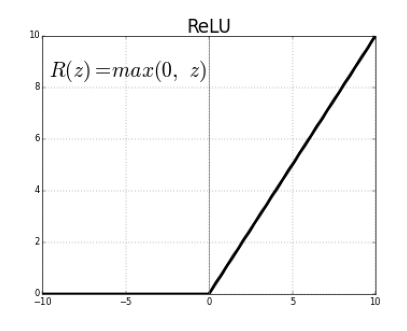

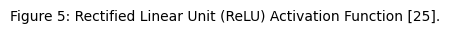

In [ ]:
import matplotlib.pyplot as plt
# Read in the image
im=plt.imread('ReLU.png')
# Setup a figure
figureSize = 5
fig = plt.figure(figsize=[figureSize, figureSize])
# Show the image in the figure and remove axes.
plt.imshow(im); plt.axis('off'); plt.show();
# Setup a new figure for the caption.
fig = plt.figure(figsize=[0.01,0.01]); plt.axis('off');
# Write the caption here
captionText = 'Figure 5: Rectified Linear Unit (ReLU) Activation Function [25].'
# Show the caption text.
plt.figtext(0.1, 0.1, captionText); plt.show()

After the convolutional layers, the output was flattened into a one-dimensional array and passed through two fully connected layers, with the second providing 10 outputs corresponding to the CIFAR-10 dataset classes. Adjustments were made to the base CNN model to match each experiment's objectives. Details regarding the architecture of the base model are shown in Figure 6.

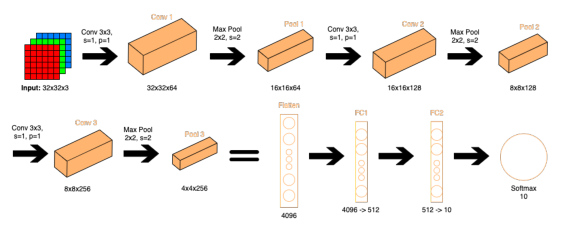

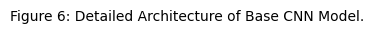

In [ ]:
import matplotlib.pyplot as plt
# Read in the image
im=plt.imread('CNNDiagram.png')
# Setup a figure
figureSize = 7
fig = plt.figure(figsize=[figureSize, figureSize])
# Show the image in the figure and remove axes.
plt.imshow(im); plt.axis('off'); plt.show();
# Setup a new figure for the caption.
fig = plt.figure(figsize=[0.01,0.01]); plt.axis('off');
# Write the caption here
captionText = 'Figure 6: Detailed Architecture of Base CNN Model.'
# Show the caption text.
plt.figtext(0.1, 0.1, captionText); plt.show()

## Loss function (3 MARKS) <ignore>

The loss function measures the error between predicted and actual values during training and is used as a learning criterion for the optimisation function to minimise this error for the model to predict new inputs correctly. For classification models like this project, cross entropy (CE) is a commonly used loss function. CE evaluates the difference between the predicted probability distribution and the actual distribution in classification tasks, assigning penalties based on their distance. However, one of the flaws of CE is that while it assesses classification correctness, it overlooks compactness within classes and margins between them [14,15].

## Optimser (4 MARKS) <ignore>

The main purpose of the optimisation function is to iteratively adjust network attributes like weights during training to minimise the loss function value, enhancing the model's learning. Optimisers use gradient descent backpropagation to calculate the gradients of the loss function relative to the network's weights by propagating errors backward, indicating the direction and magnitude of adjustments needed to minimise the loss [16,17]. Initially, the Adam optimiser was considered for its computational efficiency. However, it peaked quickly, limiting information gathered from accuracy curves. Instead, the SGD optimiser was used to better study the impact of experiment variations and to explore optimisation landscapes more deeply. SGD calculates the gradient of the loss function using the minimum number of training samples each iteration to adjust the weight [18]. With SGD two main hyperparameters were used. Learning rate is used to determine how much the model (stepsize) should change regarding the error each time the model parameters are updated [19]. And momentum which helps accelerate gradient vectors in the right direction for faster convergence.

## Experiments <ignore>
### Experiment 1 (8 MARKS)

For the first experiment, the training dataset was split into training and validation sets at an 80% to 20% ratio. The effects of five different learning rates on model performance and accuracy were measured on these both sets. Based on these results, a “StepLR” scheduler was implemented, which was thought to achieve better generalisation and accuracy by reducing the learning rate at specified stepsizes. The results obtained using this scheduler were compared with the best performance achieved without using the scheduler, in terms of generalisability and accuracy, both on validation and testing datasets. Finally, according to these results it was determined whether the use of scheduler improve the performance in terms of generalisation and accuracy. No changes were made to the base CNN architecture, and the “training_and_validation” function was made to take a scheduler as a parameter if needed.

### Experiment 2 (8 MARKS) <ignore>

Dropout rate is a regularisation method that sets the probability at which each neuron's activation in the selected layer is stochastically set to zero during training to prevent overfitting and improve generalisation [20]. For the second experiment, the training dataset was equally split into training and validation sets. In the first part, to investigate the effects of regularisation, dropout was implemented on fully connected layers and the effects of five different dropout rates including zero in terms of generalisation and accuracy were measured on both datasets. In the second part, a new CNN model that uses transfer learning was developed with frozen convolutional layers and reinitialised fully connected layers. Using this model, the dropout rate that achieved the best performance was compared with a zero-dropout rate, and the results were evaluated in terms of generalisation and accuracy, first on the validation and then on the testing dataset. For this part, training data was used for validation and validation data for training. To mitigate the limitation of frozen layers and provide more detailed results, both learning rate and number of epochs were increased.

### Experiment 3 (8 MARKS) <ignore>

The first three parts of 3rd experiment involved recording gradients from the first 5 episodes and the last 5 episodes during training and examining the effects on these gradients. However, as recording these gradients was not implemented in this project, only the fourth part of the third experiment was conducted. In this part, batch normalisation was added to the base model without dropout, and the results obtained with this model were compared with the results of the first experiment to see the effects of batch normalisation. This experiment was conducted using the “0.001” learning rate, which achieved the best performance without using a scheduler in the first experiment.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, models, transforms
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import random_split
import numpy as np
import matplotlib.pyplot as plt

#lab6 and PyTorch website were used when loading the CIFAR-10 dataset, creating the base CNN model,
#and creating the train and validation function.

#defines transformations for both training and testing data
transform = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        #applies horizontal flip with 50% chance as an data augmentation technique
        transforms.ToTensor(),
        #turns image data into tensor
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        #applies normalisation to image pixel values to scale values between -1 and 1
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]),
}

batch_size = 32

#loads CIFAR-10 training and testing datasets
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform['train'])

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform['test'])

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#base cnn model consisting of 3 convolutional and 2 fully connected layers
#ReLU a non-linear activation function and max-pooling was applied to all conv layers
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
    self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
    self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(256 * 4 * 4, 512)
    self.fc2 = nn.Linear(512, 10)

  def forward(self, x):
    x = F.relu(self.pool(self.conv1(x)))
    x = F.relu(self.pool(self.conv2(x)))
    x = F.relu(self.pool(self.conv3(x)))
    x = x.view(-1, 256 * 4 * 4)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

model = CNN().to(device)
criterion = nn.CrossEntropyLoss()

def train_and_validate(model, train_data, validation_data, criterion, optimiser, scheduler=None, num_epochs=25):
  #training the CNN
  model.to(device)
  #lists to store train and validation accuracies
  train_accuracies = []
  val_accuracies = []
  for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for data in train_data:
      inputs, labels = data
      inputs = inputs.to(device)
      labels = labels.to(device)
      optimiser.zero_grad()
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward() #backprobagation with loss function
      optimiser.step() #optimises according to the error
      running_loss += loss.item()
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
    train_acc = 100 * correct / total
    train_accuracies.append(train_acc)

    #validation starts here
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
      for data in validation_data:
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        val_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        val_total += labels.size(0)
        val_correct += (predicted == labels).sum().item()
    val_acc = 100 * val_correct / val_total
    val_accuracies.append(val_acc)
    avg_val_loss = val_loss / len(validation_data)

    #increases the step number if there is a scheduler in use
    if scheduler:
      scheduler.step()

    print(f'Epoch {epoch + 1}: Train Loss: {running_loss / len(train_data):.3f}, Train Acc: {train_acc:.2f}%, Val Loss: {avg_val_loss:.3f}, Val Acc: {val_acc:.2f}%')
  #returns the lists stored train and validation accuracies
  return train_accuracies, val_accuracies

100%|██████████| 170498071/170498071 [00:05<00:00, 29950937.39it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


# Results (instructions) - 55 MARKS <ignore>
Use the Results section to summarise your findings from the experiments. For each experiment, use the Markdown/text cell to describe and explain your results, and use the code cell (and additional code cells if necessary) to conduct the experiment and produce figures to show your results.

### Experiment 1 (17 MARKS) <ignore>

As shown in Figures 7 and 8, while the learning rate was low, both training and validation performance was poor because the model was not able learn effectively. As the learning rate increased (especially after 0.001), both training and validation were increased. However, while validation accuracy peaked around 70% and then slowed regardless of the learning rate, training accuracy continued to rise, increasing the gap between accuracies and worsening generalisation. The best result was achieved with a learning rate of “0.001”, which featured a relatively high validation accuracy and a modest generalisation gap. Based on these findings, a StepLR scheduler that halved the learning rate every 10 steps, starting at “0.001”, was implemented as the results are shown in Figure 9. As shown in Figures 10 and 11 which details validation and testing, even though this approach slightly reduced accuracy, it improved generalisation by reducing the gap, confirming that a well-tuned scheduler can significantly improve model’s performance.

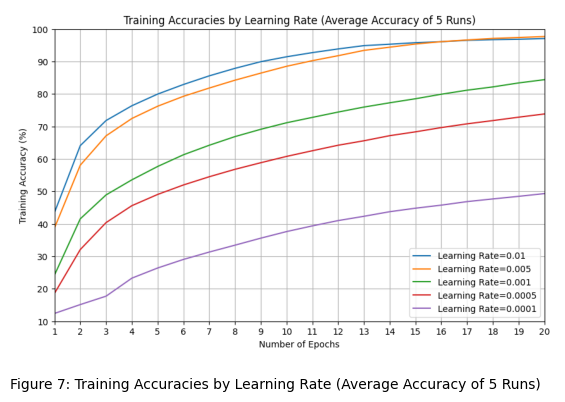

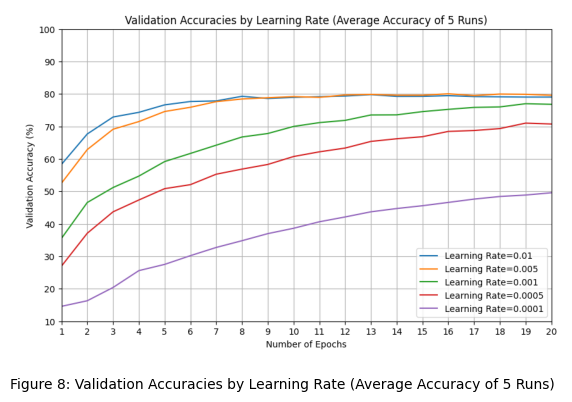

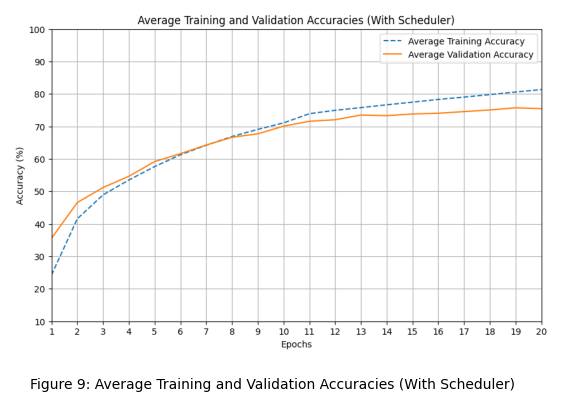

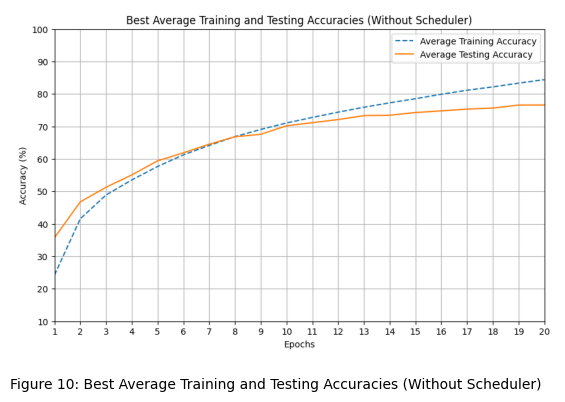

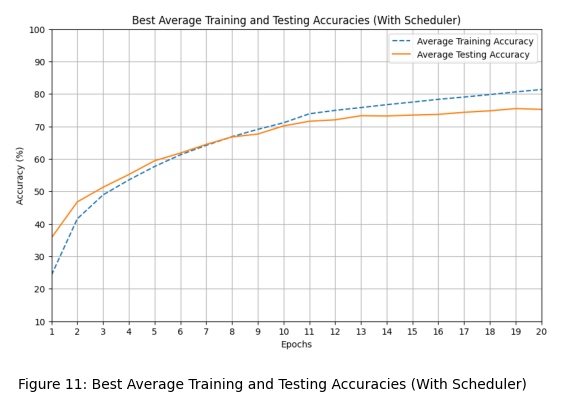

In [ ]:
image_files = ['Experiment1Result1.png', 'Experiment1Result2.png', 'Experiment1Result3.png', 'Experiment1Result4.png', 'Experiment1Result5.png']
captions = [
    'Figure 7: Training Accuracies by Learning Rate (Average Accuracy of 5 Runs)',
    'Figure 8: Validation Accuracies by Learning Rate (Average Accuracy of 5 Runs)',
    'Figure 9: Average Training and Validation Accuracies (With Scheduler)',
    'Figure 10: Best Average Training and Testing Accuracies (Without Scheduler)',
    'Figure 11: Best Average Training and Testing Accuracies (With Scheduler)'
]

for i in range(len(image_files)):
  im = plt.imread(image_files[i])
  figureSize = 7
  fig = plt.figure(figsize=[figureSize, figureSize])
  plt.imshow(im)
  plt.axis('off')
  fig.text(0.5, 0.2, captions[i], ha='center')
  plt.show()

In [ ]:
num_train = len(trainset)
train_size = int(0.8 * num_train)
val_size = num_train - train_size

#randomly splits the data into 80 to 20 ratio for training and validation data
train_data, val_data = random_split(trainset, [train_size, val_size])

trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
validloader = torch.utils.data.DataLoader(val_data, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

epochs = range(1, 21)

#runs the first experiment
def run_experiment(num_runs, learning_rates, train_data, validation_data, scheduler_func=None, scheduler_params=None):
  #creates a dictionary called results to store trainig and validation accuracy
  #to be used to plot the results
  results = {lr: {'train_acc': [], 'val_acc': []} for lr in learning_rates}
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  for lr in learning_rates:
    for run in range(num_runs):
      torch.manual_seed(run)
      np.random.seed(run)
      model = CNN().to(device)
      optimiser = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
      criterion = nn.CrossEntropyLoss()
      scheduler = None
      #if the scheduler is not given as a parameter scheduler is not used
      if scheduler_func and scheduler_params:
        #applies the parameters given for the scheduler to scheduler to use
        scheduler = scheduler_func(optimiser, **scheduler_params)
      print(f'Learning Rate: {lr}, Run: {run+1}')
      train_acc, val_acc = train_and_validate(model, train_data, validation_data, criterion, optimiser, scheduler, num_epochs=20)
      #appends the training and validation accuracies for each epoch
      results[lr]['train_acc'].append(train_acc)
      results[lr]['val_acc'].append(val_acc)
    #gets the average of 5 runs
    results[lr]['train_acc'] = np.mean(results[lr]['train_acc'], axis=0)
    results[lr]['val_acc'] = np.mean(results[lr]['val_acc'], axis=0)
  return results

In [ ]:
learning_rates = [0.01, 0.005, 0.001, 0.0005, 0.0001]
learning_rates_results = run_experiment(num_runs=5, learning_rates=learning_rates, train_data = trainloader, validation_data = validloader)

Learning Rate: 0.01, Run: 1


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 1: Train Loss: 1.530, Train Acc: 43.91%, Val Loss: 1.154, Val Acc: 58.82%
Epoch 2: Train Loss: 1.002, Train Acc: 64.64%, Val Loss: 0.887, Val Acc: 68.72%
Epoch 3: Train Loss: 0.797, Train Acc: 72.23%, Val Loss: 0.742, Val Acc: 74.31%
Epoch 4: Train Loss: 0.666, Train Acc: 76.83%, Val Loss: 0.736, Val Acc: 74.66%
Epoch 5: Train Loss: 0.568, Train Acc: 80.31%, Val Loss: 0.673, Val Acc: 76.92%
Epoch 6: Train Loss: 0.480, Train Acc: 83.17%, Val Loss: 0.645, Val Acc: 78.53%
Epoch 7: Train Loss: 0.411, Train Acc: 85.71%, Val Loss: 0.676, Val Acc: 77.60%
Epoch 8: Train Loss: 0.345, Train Acc: 87.96%, Val Loss: 0.654, Val Acc: 79.50%
Epoch 9: Train Loss: 0.288, Train Acc: 90.22%, Val Loss: 0.689, Val Acc: 79.35%
Epoch 10: Train Loss: 0.244, Train Acc: 91.65%, Val Loss: 0.778, Val Acc: 77.88%
Epoch 11: Train Loss: 0.204, Train Acc: 92.97%, Val Loss: 0.761, Val Acc: 78.94%
Epoch 12: Train Loss: 0.185, Train Acc: 93.70%, Val Loss: 0.820, Val Acc: 78.72%
Epoch 13: Train Loss: 0.152, Train Ac

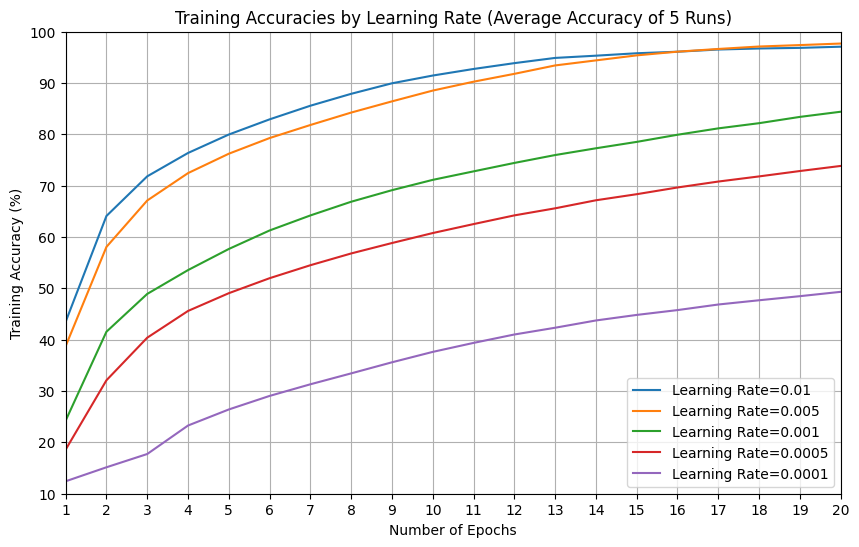

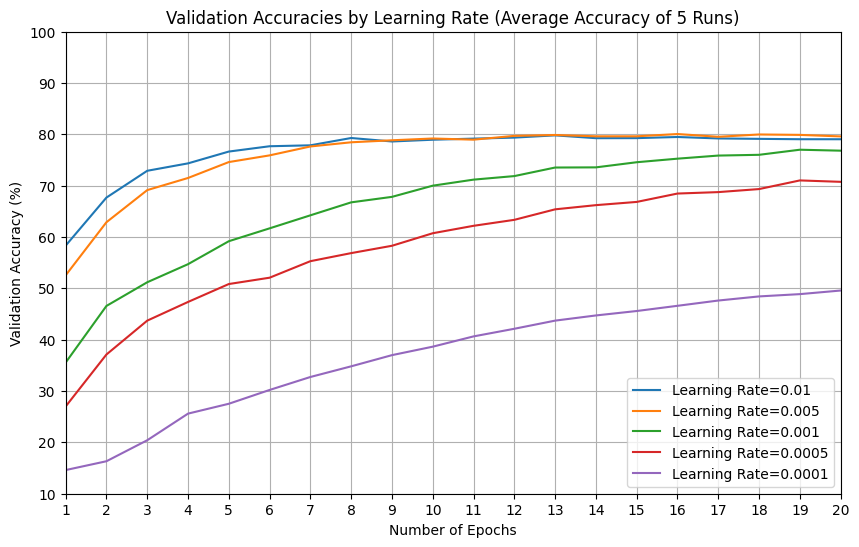

In [ ]:
epochs = range(1, 21)
fig, ax1 = plt.subplots(figsize=(10, 6))
for lr in learning_rates:
  ax1.plot(epochs, learning_rates_results[lr]['train_acc'], label=f'Learning Rate={lr}')
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Training Accuracy (%)')
ax1.set_title('Training Accuracies by Learning Rate (Average Accuracy of 5 Runs)')
ax1.legend()
ax1.grid(True)
ax1.set_ylim(10, 100)
ax1.set_yticks(np.arange(10, 101, 10))
ax1.set_xlim(1, 20)
ax1.set_xticks(range(1, 21))

fig, ax2 = plt.subplots(figsize=(10, 6))
for lr in learning_rates:
  ax2.plot(epochs, learning_rates_results[lr]['val_acc'], label=f'Learning Rate={lr}')
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Validation Accuracy (%)')
ax2.set_title('Validation Accuracies by Learning Rate (Average Accuracy of 5 Runs)')
ax2.legend()
ax2.grid(True)
ax2.set_ylim(10, 100)
ax2.set_yticks(np.arange(10, 101, 10))
ax2.set_xlim(1, 20)
ax2.set_xticks(range(1, 21))
plt.show()

Learning Rate: 0.001, Run: 1
Epoch 1: Train Loss: 2.096, Train Acc: 23.02%, Val Loss: 1.815, Val Acc: 34.34%
Epoch 2: Train Loss: 1.613, Train Acc: 41.62%, Val Loss: 1.476, Val Acc: 46.50%
Epoch 3: Train Loss: 1.414, Train Acc: 49.13%, Val Loss: 1.323, Val Acc: 52.93%
Epoch 4: Train Loss: 1.291, Train Acc: 53.62%, Val Loss: 1.266, Val Acc: 54.64%
Epoch 5: Train Loss: 1.184, Train Acc: 58.18%, Val Loss: 1.139, Val Acc: 59.24%
Epoch 6: Train Loss: 1.092, Train Acc: 61.47%, Val Loss: 1.092, Val Acc: 60.92%
Epoch 7: Train Loss: 1.008, Train Acc: 64.55%, Val Loss: 0.997, Val Acc: 65.36%
Epoch 8: Train Loss: 0.929, Train Acc: 67.45%, Val Loss: 0.953, Val Acc: 67.17%
Epoch 9: Train Loss: 0.873, Train Acc: 69.52%, Val Loss: 0.879, Val Acc: 69.37%
Epoch 10: Train Loss: 0.816, Train Acc: 71.66%, Val Loss: 0.866, Val Acc: 70.03%
Epoch 11: Train Loss: 0.744, Train Acc: 74.13%, Val Loss: 0.803, Val Acc: 72.08%
Epoch 12: Train Loss: 0.712, Train Acc: 75.29%, Val Loss: 0.839, Val Acc: 71.16%
Epoch 13

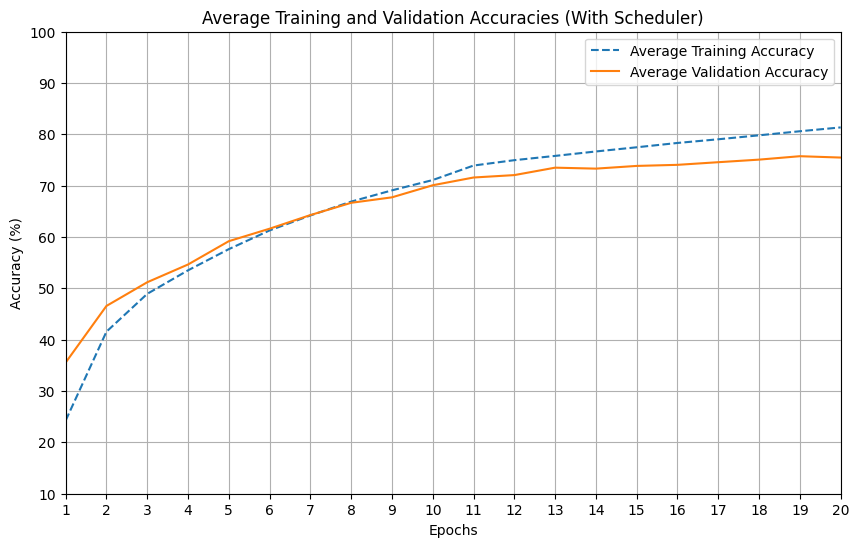

In [ ]:
scheduler_params = {'step_size': 10, 'gamma': 0.5}
scheduler_results = run_experiment(num_runs=5, learning_rates=[0.001], train_data = trainloader, validation_data = validloader,
                                   scheduler_func=torch.optim.lr_scheduler.StepLR, scheduler_params=scheduler_params)
learning_rate = 0.001
scheduler_train_results = scheduler_results[learning_rate]['train_acc']
scheduler_val_results = scheduler_results[learning_rate]['val_acc']

plt.figure(figsize=(10, 6))
plt.plot(epochs, scheduler_train_results, label='Average Training Accuracy', linestyle='--')
plt.plot(epochs, scheduler_val_results, label='Average Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Average Training and Validation Accuracies (With Scheduler)')
plt.legend()
plt.grid(True)
plt.ylim(10, 100)
plt.yticks(np.arange(10, 101, 10))
plt.xlim(1, 20)
plt.xticks(range(1, 21))
plt.show()

Learning Rate: 0.001, Run: 1
Epoch 1: Train Loss: 2.096, Train Acc: 23.03%, Val Loss: 1.806, Val Acc: 34.43%
Epoch 2: Train Loss: 1.613, Train Acc: 41.60%, Val Loss: 1.465, Val Acc: 46.97%
Epoch 3: Train Loss: 1.414, Train Acc: 49.12%, Val Loss: 1.320, Val Acc: 52.45%
Epoch 4: Train Loss: 1.290, Train Acc: 53.69%, Val Loss: 1.260, Val Acc: 54.81%
Epoch 5: Train Loss: 1.183, Train Acc: 58.26%, Val Loss: 1.134, Val Acc: 59.51%
Epoch 6: Train Loss: 1.091, Train Acc: 61.47%, Val Loss: 1.093, Val Acc: 61.04%
Epoch 7: Train Loss: 1.008, Train Acc: 64.50%, Val Loss: 0.990, Val Acc: 65.35%
Epoch 8: Train Loss: 0.930, Train Acc: 67.53%, Val Loss: 0.950, Val Acc: 67.36%
Epoch 9: Train Loss: 0.874, Train Acc: 69.52%, Val Loss: 0.873, Val Acc: 69.54%
Epoch 10: Train Loss: 0.817, Train Acc: 71.69%, Val Loss: 0.856, Val Acc: 70.22%
Epoch 11: Train Loss: 0.774, Train Acc: 72.84%, Val Loss: 0.808, Val Acc: 72.05%
Epoch 12: Train Loss: 0.724, Train Acc: 74.73%, Val Loss: 0.836, Val Acc: 71.28%
Epoch 13

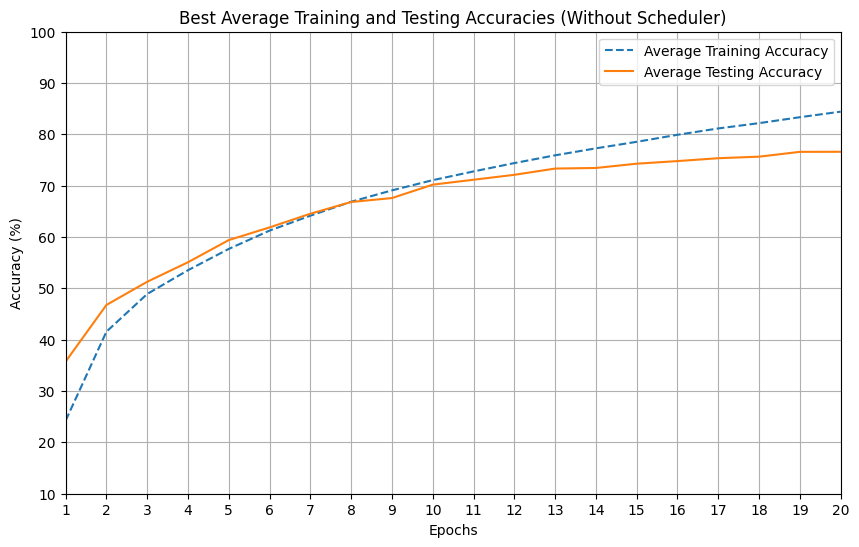

In [ ]:
learning_rate_final_results = run_experiment(num_runs=5, learning_rates=[0.001], train_data = trainloader, validation_data = testloader)
learning_rate = 0.001
learning_rate_train_results = learning_rate_final_results[learning_rate]['train_acc']
learning_rate_test_results = learning_rate_final_results[learning_rate]['val_acc']

plt.figure(figsize=(10, 6))
plt.plot(epochs, learning_rate_train_results, label='Average Training Accuracy', linestyle='--')
plt.plot(epochs, learning_rate_test_results, label='Average Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Best Average Training and Testing Accuracies (Without Scheduler)')
plt.legend()
plt.grid(True)
plt.ylim(10, 100)
plt.yticks(np.arange(10, 101, 10))
plt.xlim(1, 20)
plt.xticks(range(1, 21))
plt.show()

Learning Rate: 0.001, Run: 1
Epoch 1: Train Loss: 2.096, Train Acc: 23.02%, Val Loss: 1.807, Val Acc: 34.34%
Epoch 2: Train Loss: 1.613, Train Acc: 41.61%, Val Loss: 1.465, Val Acc: 46.95%
Epoch 3: Train Loss: 1.414, Train Acc: 49.05%, Val Loss: 1.321, Val Acc: 52.43%
Epoch 4: Train Loss: 1.291, Train Acc: 53.63%, Val Loss: 1.259, Val Acc: 54.93%
Epoch 5: Train Loss: 1.183, Train Acc: 58.22%, Val Loss: 1.134, Val Acc: 59.58%
Epoch 6: Train Loss: 1.092, Train Acc: 61.48%, Val Loss: 1.094, Val Acc: 61.08%
Epoch 7: Train Loss: 1.008, Train Acc: 64.53%, Val Loss: 0.989, Val Acc: 65.49%
Epoch 8: Train Loss: 0.929, Train Acc: 67.44%, Val Loss: 0.948, Val Acc: 67.34%
Epoch 9: Train Loss: 0.873, Train Acc: 69.47%, Val Loss: 0.874, Val Acc: 69.64%
Epoch 10: Train Loss: 0.817, Train Acc: 71.75%, Val Loss: 0.856, Val Acc: 70.33%
Epoch 11: Train Loss: 0.745, Train Acc: 74.20%, Val Loss: 0.800, Val Acc: 72.03%
Epoch 12: Train Loss: 0.711, Train Acc: 75.31%, Val Loss: 0.838, Val Acc: 70.99%
Epoch 13

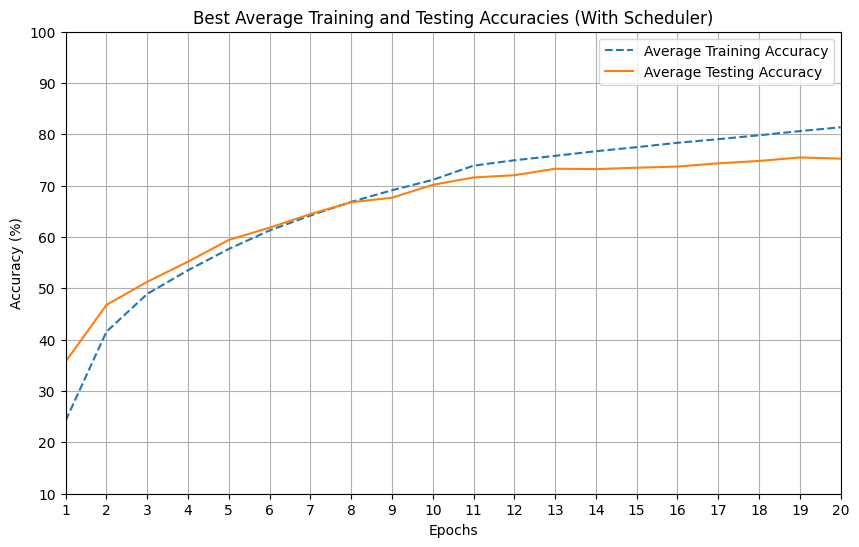

In [ ]:
scheduler_final_results = run_experiment(num_runs=5, learning_rates=[0.001], train_data = trainloader, validation_data = testloader,
                                         scheduler_func=torch.optim.lr_scheduler.StepLR, scheduler_params=scheduler_params)
learning_rate = 0.001
scheduler_train_final_results = scheduler_final_results[learning_rate]['train_acc']
scheduler_test_final_results = scheduler_final_results[learning_rate]['val_acc']

plt.figure(figsize=(10, 6))
plt.plot(epochs, scheduler_train_final_results, label='Average Training Accuracy', linestyle='--')
plt.plot(epochs, scheduler_test_final_results, label='Average Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Best Average Training and Testing Accuracies (With Scheduler)')
plt.legend()
plt.grid(True)
plt.ylim(10, 100)
plt.yticks(np.arange(10, 101, 10))
plt.xlim(1, 20)
plt.xticks(range(1, 21))
plt.show()

### Experiment 2 (19 MARKS) <ignore>

Looking at Figures 12 and 13 from the first part of the second experiment, when the dropout rate is “0.0” (no dropout applied), there is a 7% gap between the training and validation accuracies, suggesting the model overfits and does not generalise well. As the dropout rate increases, the gap decreases and both accuracies converge which indicates it is generalising better. However, excessively increasing the dropout rate also slows down the learning process. Based on the results, the most optimal performance in terms of both generalisability and accuracy was achieved with a dropout rate of “0.4”. Figures 14 and 15, which detail the second part of the second experiment, show a decrease in accuracy when convolutional layers are frozen. Freezing these layers limits the model's capacity to learn new or more relevant features from the data, requiring the fully connected layers to classify based on previously extracted features. Regarding generalisability, the optimal dropout rate from the first part of the experiment shows no generalisability gap. This indicates that the model maintains good generalisability and, unlike configurations without a dropout rate, does not suffer from overfitting.

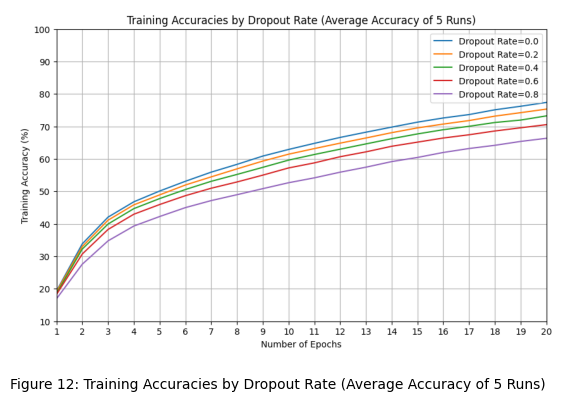

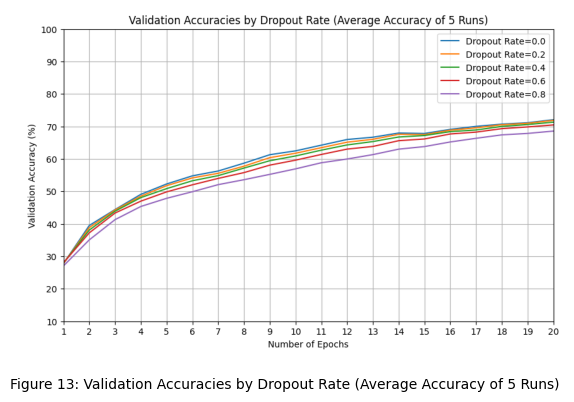

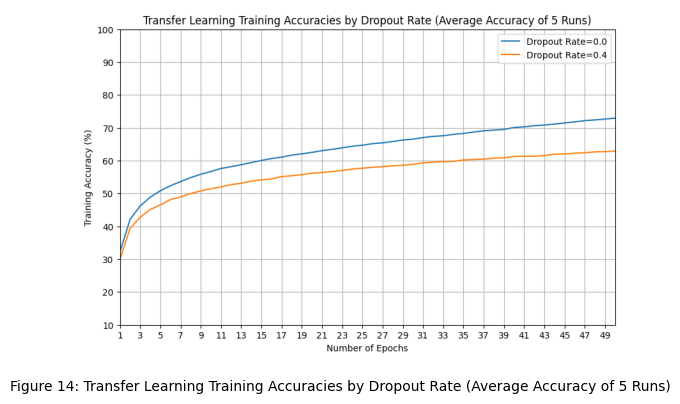

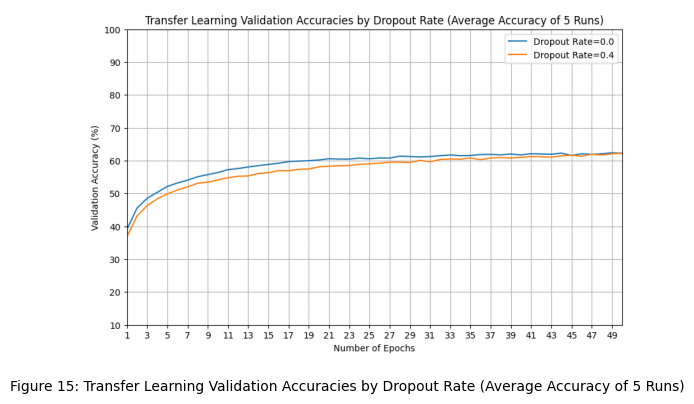

In [ ]:
image_files = ['Experiment2Result1.png', 'Experiment2Result2.png', 'Experiment2Result3.png', 'Experiment2Result4.png']
captions = [
    'Figure 12: Training Accuracies by Dropout Rate (Average Accuracy of 5 Runs)',
    'Figure 13: Validation Accuracies by Dropout Rate (Average Accuracy of 5 Runs)',
    'Figure 14: Transfer Learning Training Accuracies by Dropout Rate (Average Accuracy of 5 Runs)',
    'Figure 15: Transfer Learning Validation Accuracies by Dropout Rate (Average Accuracy of 5 Runs)'
]

for i in range(len(image_files)):
  im = plt.imread(image_files[i])
  figureSize = 7
  fig = plt.figure(figsize=[figureSize, figureSize])
  plt.imshow(im)
  plt.axis('off')
  fig.text(0.5, 0.2, captions[i], ha='center')
  plt.show()

In [ ]:
num_train = len(trainset)
train_size = int(0.5 * num_train)
val_size = num_train - train_size

#randomly splits the data into 50 to 50 ratio for training and validation data

train_data2, val_data2 = random_split(trainset, [train_size, val_size])
trainloader2 = torch.utils.data.DataLoader(train_data2, batch_size=batch_size, shuffle=True, num_workers=2)
validloader2 = torch.utils.data.DataLoader(val_data2, batch_size=batch_size, shuffle=False, num_workers=2)

class DropoutCNN(nn.Module):
  def __init__(self, dropout_rate=0.0):
    super(DropoutCNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
    self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
    self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(256 * 4 * 4, 512)
    #applies dropout to fully connected layers
    self.dropout = nn.Dropout(dropout_rate)
    self.fc2 = nn.Linear(512, 10)

  def forward(self, x):
    x = F.relu(self.pool(self.conv1(x)))
    x = F.relu(self.pool(self.conv2(x)))
    x = F.relu(self.pool(self.conv3(x)))
    x = x.view(-1, 256 * 4 * 4)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = self.fc2(x)
    return x


dropout_model = DropoutCNN().to(device)

#does the same thing as first experiment but with dropout rates
def run_experiment2(num_runs, dropout_rates, train_data, validation_data):
  results = {rate: {'train_acc': [], 'val_acc': []} for rate in dropout_rates}
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  for rate in dropout_rates:
    for run in range(num_runs):
      torch.manual_seed(run)
      np.random.seed(run)
      model = DropoutCNN(dropout_rate=rate).to(device)
      optimiser = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
      criterion = nn.CrossEntropyLoss()
      scheduler = None
      print(f'Testing Dropout Rate: {rate}, Run: {run+1}')
      train_acc, val_acc = train_and_validate(model, train_data, validation_data, criterion, optimiser, scheduler, num_epochs=20)
      results[rate]['train_acc'].append(train_acc)
      results[rate]['val_acc'].append(val_acc)
    results[rate]['train_acc'] = np.mean(results[rate]['train_acc'], axis=0)
    results[rate]['val_acc'] = np.mean(results[rate]['val_acc'], axis=0)
  return results

In [ ]:
dropout_rates = [0.0, 0.2, 0.4, 0.6, 0.8]
dropout_rates_results = run_experiment2(num_runs=5, dropout_rates=dropout_rates, train_data = trainloader2, validation_data = validloader2)

Testing Dropout Rate: 0.0, Run: 1
Epoch 1: Train Loss: 2.222, Train Acc: 16.67%, Val Loss: 1.992, Val Acc: 27.77%
Epoch 2: Train Loss: 1.836, Train Acc: 33.84%, Val Loss: 1.693, Val Acc: 39.11%
Epoch 3: Train Loss: 1.594, Train Acc: 42.28%, Val Loss: 1.513, Val Acc: 45.13%
Epoch 4: Train Loss: 1.462, Train Acc: 46.73%, Val Loss: 1.405, Val Acc: 48.88%
Epoch 5: Train Loss: 1.376, Train Acc: 49.94%, Val Loss: 1.318, Val Acc: 52.56%
Epoch 6: Train Loss: 1.297, Train Acc: 53.28%, Val Loss: 1.242, Val Acc: 55.40%
Epoch 7: Train Loss: 1.227, Train Acc: 56.21%, Val Loss: 1.196, Val Acc: 57.68%
Epoch 8: Train Loss: 1.167, Train Acc: 58.56%, Val Loss: 1.146, Val Acc: 59.18%
Epoch 9: Train Loss: 1.101, Train Acc: 61.15%, Val Loss: 1.106, Val Acc: 61.54%
Epoch 10: Train Loss: 1.036, Train Acc: 63.47%, Val Loss: 1.046, Val Acc: 63.08%
Epoch 11: Train Loss: 0.982, Train Acc: 65.22%, Val Loss: 1.010, Val Acc: 64.67%
Epoch 12: Train Loss: 0.934, Train Acc: 67.01%, Val Loss: 0.961, Val Acc: 66.26%
Epo

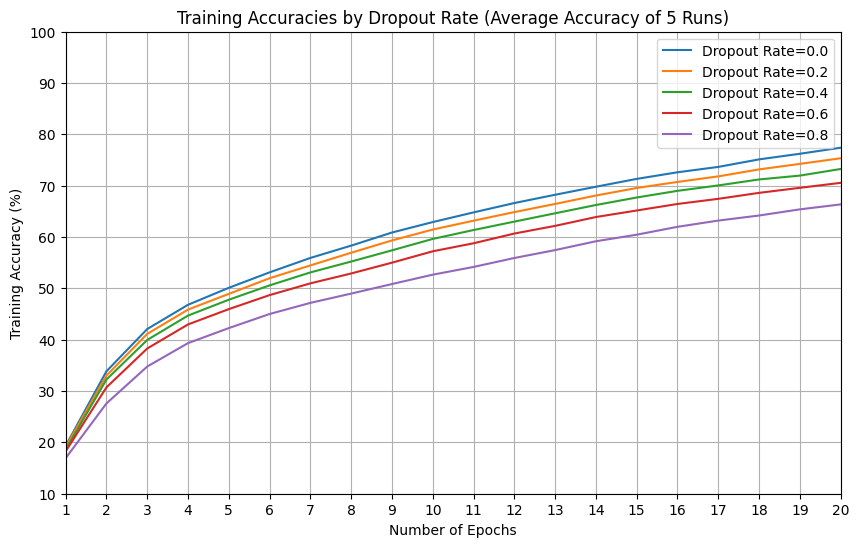

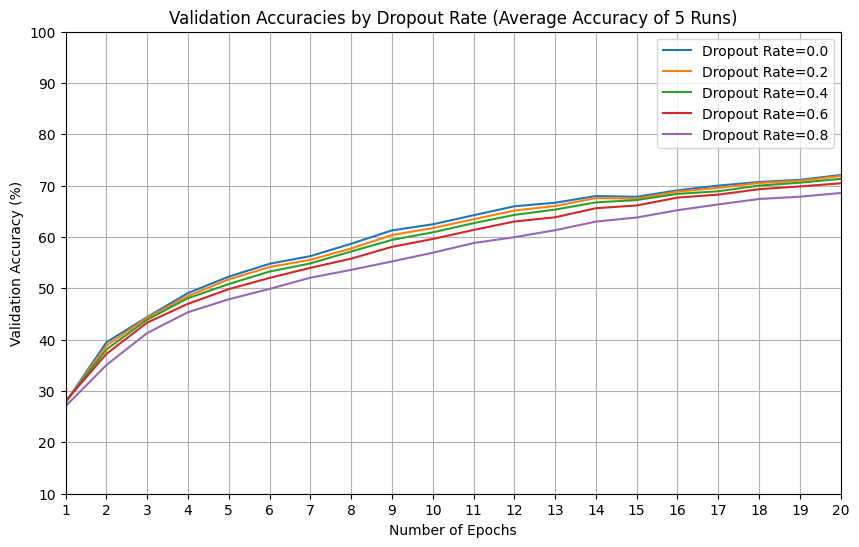

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))
for rate in dropout_rates:
  ax1.plot(epochs, dropout_rates_results[rate]['train_acc'], label=f'Dropout Rate={rate}')
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Training Accuracy (%)')
ax1.set_title('Training Accuracies by Dropout Rate (Average Accuracy of 5 Runs)')
ax1.legend()
ax1.grid(True)
ax1.set_ylim(10, 100)
ax1.set_yticks(np.arange(10, 101, 10))
ax1.set_xlim(1, 20)
ax1.set_xticks(range(1, 21))

fig, ax2 = plt.subplots(figsize=(10, 6))
for rate in dropout_rates:
  ax2.plot(epochs, dropout_rates_results[rate]['val_acc'], label=f'Dropout Rate={rate}')
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Validation Accuracy (%)')
ax2.set_title('Validation Accuracies by Dropout Rate (Average Accuracy of 5 Runs)')
ax2.legend()
ax2.grid(True)
ax2.set_ylim(10, 100)
ax2.set_yticks(np.arange(10, 101, 10))
ax2.set_xlim(1, 20)
ax2.set_xticks(range(1, 21))
plt.show()

In [ ]:
class TransferCNN(nn.Module):
  def __init__(self, dropout_rate=0.0):
    super(TransferCNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
    self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
    self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(256 * 4 * 4, 512)
    self.dropout = nn.Dropout(dropout_rate)
    self.fc2 = nn.Linear(512, 10)
    self.freeze_conv_layers()

  def forward(self, x):
    x = F.relu(self.pool(self.conv1(x)))
    x = F.relu(self.pool(self.conv2(x)))
    x = F.relu(self.pool(self.conv3(x)))
    x = x.view(-1, 256 * 4 * 4)
    x = F.relu(self.fc1(x))
    x = self.dropout(x)
    x = self.fc2(x)
    return x

  def freeze_conv_layers(self):
    #freezes each conv layers in the network by setting param.requires_grad to False
    for param in self.conv1.parameters():
      param.requires_grad = False
    for param in self.conv2.parameters():
      param.requires_grad = False
    for param in self.conv3.parameters():
      param.requires_grad = False

  def reinitialise(self):
    self.reinitialise_layer(self.fc1)
    self.reinitialise_layer(self.fc2)

  def reinitialise_layer(self, layer):
    if isinstance(layer, nn.Linear):
      nn.init.xavier_uniform_(layer.weight)
      if layer.bias is not None:
        nn.init.zeros_(layer.bias)

def transfer_learning_experiment(num_runs, dropout_rates, train_data, validation_data):
  results = {rate: {'train_acc': [], 'val_acc': []} for rate in dropout_rates}
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  for rate in dropout_rates:
    for run in range(num_runs):
      torch.manual_seed(run)
      np.random.seed(run)
      model = TransferCNN(dropout_rate=rate).to(device)
      #reinitilasies the fully connected layers
      model.reinitialise()
      #applies the optimiser to only those who are not frozen
      optimiser = optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=0.01, momentum=0.9)
      criterion = nn.CrossEntropyLoss()
      scheduler = None
      print(f'Transfer Learning with Dropout Rate: {rate}, Run: {run+1}')
      train_acc, val_acc = train_and_validate(model, train_data, validation_data, criterion, optimiser, scheduler, num_epochs=50)
      results[rate]['train_acc'].append(train_acc)
      results[rate]['val_acc'].append(val_acc)
    results[rate]['train_acc'] = np.mean(results[rate]['train_acc'], axis=0)
    results[rate]['val_acc'] = np.mean(results[rate]['val_acc'], axis=0)
  return results

dropout_rates2 = [0.0, 0.4]
#uses valdiation data as training and training as validation
transfer_results = transfer_learning_experiment(num_runs=5, dropout_rates=dropout_rates2, train_data=validloader2, validation_data=trainloader2)

Transfer Learning with Dropout Rate: 0.0, Run: 1
Epoch 1: Train Loss: 1.901, Train Acc: 32.60%, Val Loss: 1.667, Val Acc: 39.37%
Epoch 2: Train Loss: 1.595, Train Acc: 42.47%, Val Loss: 1.507, Val Acc: 45.82%
Epoch 3: Train Loss: 1.486, Train Acc: 46.48%, Val Loss: 1.431, Val Acc: 48.71%
Epoch 4: Train Loss: 1.414, Train Acc: 49.21%, Val Loss: 1.376, Val Acc: 50.34%
Epoch 5: Train Loss: 1.360, Train Acc: 51.38%, Val Loss: 1.335, Val Acc: 51.84%
Epoch 6: Train Loss: 1.316, Train Acc: 52.93%, Val Loss: 1.298, Val Acc: 53.41%
Epoch 7: Train Loss: 1.283, Train Acc: 54.12%, Val Loss: 1.278, Val Acc: 53.91%
Epoch 8: Train Loss: 1.251, Train Acc: 55.35%, Val Loss: 1.253, Val Acc: 54.89%
Epoch 9: Train Loss: 1.228, Train Acc: 56.23%, Val Loss: 1.240, Val Acc: 55.21%
Epoch 10: Train Loss: 1.202, Train Acc: 57.26%, Val Loss: 1.219, Val Acc: 56.10%
Epoch 11: Train Loss: 1.181, Train Acc: 57.95%, Val Loss: 1.201, Val Acc: 56.99%
Epoch 12: Train Loss: 1.161, Train Acc: 58.75%, Val Loss: 1.204, Val 

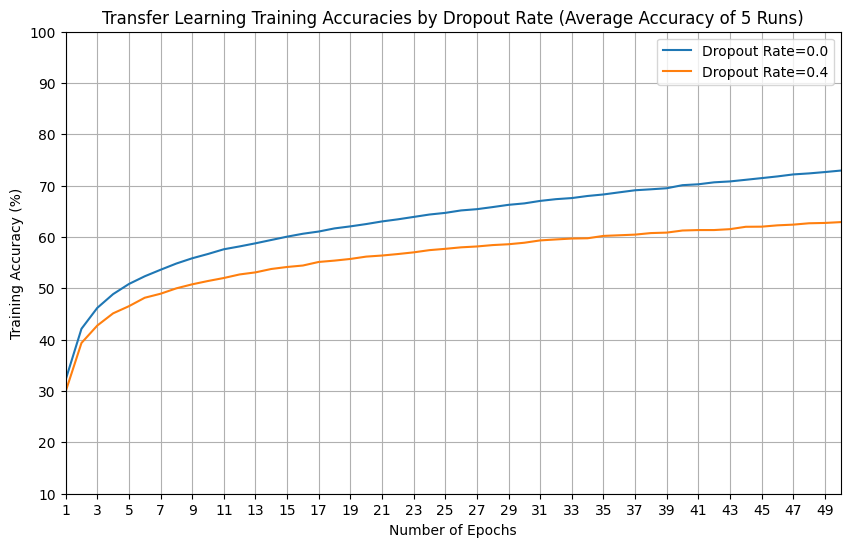

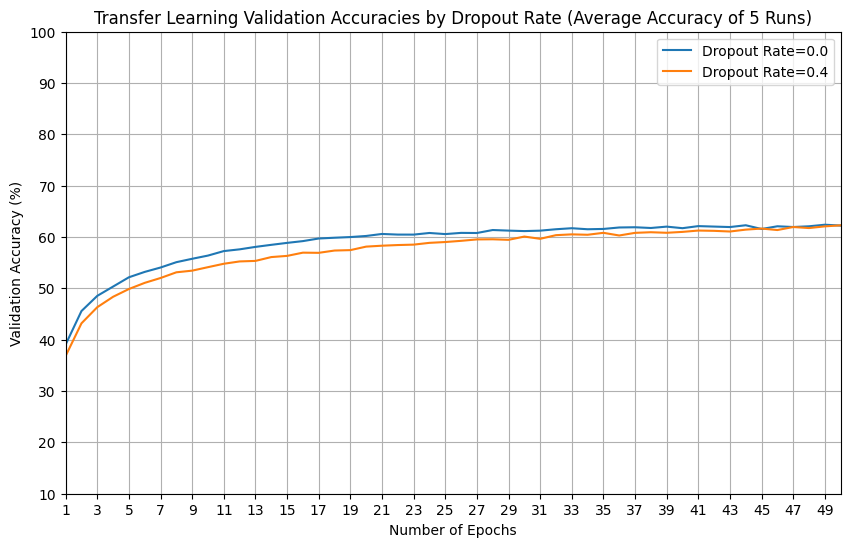

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))
for rate in dropout_rates2:
  ax1.plot(range(1, 51), transfer_results[rate]['train_acc'], label=f'Dropout Rate={rate}')
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Training Accuracy (%)')
ax1.set_title('Transfer Learning Training Accuracies by Dropout Rate (Average Accuracy of 5 Runs)')
ax1.legend()
ax1.grid(True)
ax1.set_ylim(10, 100)
ax1.set_yticks(np.arange(10, 101, 10))
ax1.set_xlim(1, 50)
ax1.set_xticks(range(1, 51, 2))

fig, ax2 = plt.subplots(figsize=(10, 6))
for rate in dropout_rates2:
  ax2.plot(range(1, 51), transfer_results[rate]['val_acc'], label=f'Dropout Rate={rate}')
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Validation Accuracy (%)')
ax2.set_title('Transfer Learning Validation Accuracies by Dropout Rate (Average Accuracy of 5 Runs)')
ax2.legend()
ax2.grid(True)
ax2.set_ylim(10, 100)
ax2.set_yticks(np.arange(10, 101, 10))
ax2.set_xlim(1, 50)
ax2.set_xticks(range(1, 51, 2))
plt.show()

### Experiment 3 (19 MARKS) <ignore>

The model with batch normalisation achieved faster convergence, reaching higher training and validation accuracies more quickly. Looking at Figures 16 and 17, by epoch 5, the model attained a validation accuracy of 77%, compared to the non-batch normalised model with the same learning rate, which only got 55% (Figure 10). However, this rapid rise led to poor generalisation, with the model having an 80% validation accuracy and a 98% training accuracy by the end of all epochs, resulting in an 18% gap. In contrast, in the first experiment the model without batch normalisation, using the same learning rate (Figure 10), had an 85% training accuracy and 76% validation accuracy, with only a 9% gap. The results obtained with batch normalisation were similar to those achieved with a higher learning rate of “0.005” in the first experiment. The model without batch normalisation, with a learning rate of “0.005” and “0.01”, achieved 97% training accuracy and 79% validation accuracy, yielding very similar results. Therefore, this implies that batch normalisation produces results similar to increasing the learning rate, enabling the model to learn more but also leading to overfitting by significantly raising the training accuracy.

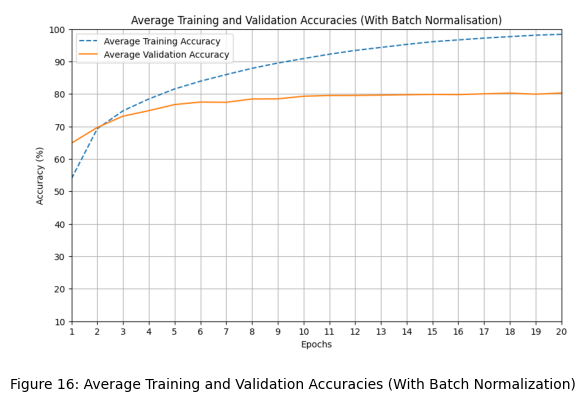

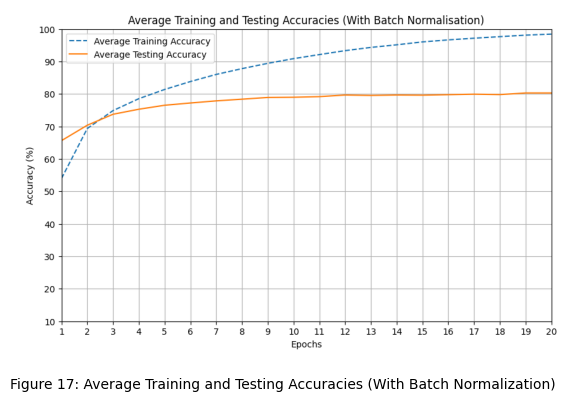

In [ ]:
image_files = ['Experiment3Result1.png', 'Experiment3Result2.png']
captions = [
    'Figure 16: Average Training and Validation Accuracies (With Batch Normalization)',
    'Figure 17: Average Training and Testing Accuracies (With Batch Normalization)'
]

for i in range(len(image_files)):
  im = plt.imread(image_files[i])
  figureSize = 7
  fig = plt.figure(figsize=[figureSize, figureSize])
  plt.imshow(im)
  plt.axis('off')
  fig.text(0.5, 0.2, captions[i], ha='center')
  plt.show()

In [ ]:
#applies batch normalisation to base CNN
class BatchNormCNN(nn.Module):
  def __init__(self):
    super(BatchNormCNN, self).__init__()
    self.conv1 = nn.Conv2d(3, 64, 3, padding=1)
    self.bn1 = nn.BatchNorm2d(64)
    self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
    self.bn2 = nn.BatchNorm2d(128)
    self.conv3 = nn.Conv2d(128, 256, 3, padding=1)
    self.bn3 = nn.BatchNorm2d(256)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc1 = nn.Linear(256 * 4 * 4, 512)
    self.fc2 = nn.Linear(512, 10)

  def forward(self, x):
    x = F.relu(self.bn1(self.pool(self.conv1(x))))
    x = F.relu(self.bn2(self.pool(self.conv2(x))))
    x = F.relu(self.bn3(self.pool(self.conv3(x))))
    x = x.view(-1, 256 * 4 * 4)
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return x

def run_experiment_bn(num_runs, train_data, validation_data):
  results = {'train_acc': [], 'val_acc': []}
  device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
  for run in range(num_runs):
    torch.manual_seed(run)
    np.random.seed(run)
    model = BatchNormCNN().to(device)
    optimiser = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    criterion = nn.CrossEntropyLoss()
    print(f'Run: {run+1}')
    train_acc, val_acc = train_and_validate(model, train_data, validation_data, criterion, optimiser, num_epochs=20)
    results['train_acc'].append(train_acc)
    results['val_acc'].append(val_acc)
  results['train_acc'] = np.mean(results['train_acc'], axis=0)
  results['val_acc'] = np.mean(results['val_acc'], axis=0)
  return results

batch_normalisation_results = run_experiment_bn(num_runs=5, train_data = trainloader, validation_data = validloader)

Run: 1
Epoch 1: Train Loss: 1.291, Train Acc: 54.52%, Val Loss: 0.996, Val Acc: 65.06%
Epoch 2: Train Loss: 0.872, Train Acc: 69.39%, Val Loss: 0.861, Val Acc: 70.17%
Epoch 3: Train Loss: 0.723, Train Acc: 75.05%, Val Loss: 0.769, Val Acc: 73.27%
Epoch 4: Train Loss: 0.614, Train Acc: 78.65%, Val Loss: 0.705, Val Acc: 75.20%
Epoch 5: Train Loss: 0.535, Train Acc: 81.75%, Val Loss: 0.678, Val Acc: 76.45%
Epoch 6: Train Loss: 0.462, Train Acc: 84.19%, Val Loss: 0.687, Val Acc: 76.99%
Epoch 7: Train Loss: 0.408, Train Acc: 86.00%, Val Loss: 0.640, Val Acc: 78.37%
Epoch 8: Train Loss: 0.357, Train Acc: 87.94%, Val Loss: 0.643, Val Acc: 79.09%
Epoch 9: Train Loss: 0.309, Train Acc: 89.46%, Val Loss: 0.651, Val Acc: 78.40%
Epoch 10: Train Loss: 0.268, Train Acc: 90.94%, Val Loss: 0.630, Val Acc: 79.56%
Epoch 11: Train Loss: 0.232, Train Acc: 92.17%, Val Loss: 0.633, Val Acc: 79.57%
Epoch 12: Train Loss: 0.196, Train Acc: 93.50%, Val Loss: 0.671, Val Acc: 79.60%
Epoch 13: Train Loss: 0.172, T

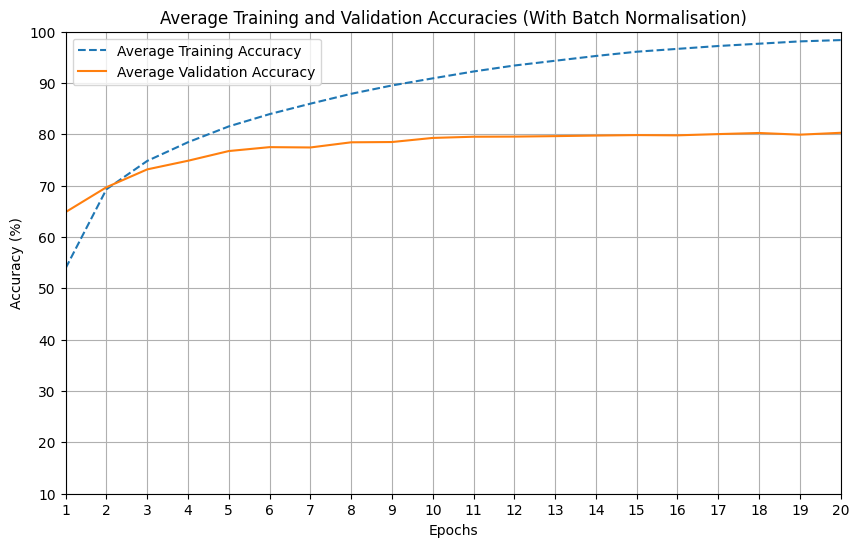

In [ ]:
learning_rate = 0.001
batch_normalisation_train_results = batch_normalisation_results['train_acc']
batch_normalisation_val_results = batch_normalisation_results['val_acc']

plt.figure(figsize=(10, 6))
plt.plot(epochs, batch_normalisation_train_results, label='Average Training Accuracy', linestyle='--')
plt.plot(epochs, batch_normalisation_val_results, label='Average Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Average Training and Validation Accuracies (With Batch Normalisation)')
plt.legend()
plt.grid(True)
plt.ylim(10, 100)
plt.yticks(np.arange(10, 101, 10))
plt.xlim(1, 20)
plt.xticks(range(1, 21))
plt.show()

In [ ]:
batch_normalisation_results2 = run_experiment_bn(num_runs=5, train_data = trainloader, validation_data = testloader)

Run: 1
Epoch 1: Train Loss: 1.291, Train Acc: 54.63%, Val Loss: 0.977, Val Acc: 65.46%
Epoch 2: Train Loss: 0.872, Train Acc: 69.40%, Val Loss: 0.838, Val Acc: 71.03%
Epoch 3: Train Loss: 0.723, Train Acc: 75.02%, Val Loss: 0.747, Val Acc: 74.16%
Epoch 4: Train Loss: 0.616, Train Acc: 78.83%, Val Loss: 0.701, Val Acc: 75.84%
Epoch 5: Train Loss: 0.537, Train Acc: 81.52%, Val Loss: 0.695, Val Acc: 76.13%
Epoch 6: Train Loss: 0.467, Train Acc: 83.92%, Val Loss: 0.683, Val Acc: 76.76%
Epoch 7: Train Loss: 0.409, Train Acc: 85.93%, Val Loss: 0.668, Val Acc: 77.92%
Epoch 8: Train Loss: 0.358, Train Acc: 87.92%, Val Loss: 0.630, Val Acc: 79.17%
Epoch 9: Train Loss: 0.309, Train Acc: 89.60%, Val Loss: 0.663, Val Acc: 78.50%
Epoch 10: Train Loss: 0.268, Train Acc: 91.10%, Val Loss: 0.651, Val Acc: 79.33%
Epoch 11: Train Loss: 0.236, Train Acc: 92.09%, Val Loss: 0.656, Val Acc: 79.11%
Epoch 12: Train Loss: 0.206, Train Acc: 93.21%, Val Loss: 0.656, Val Acc: 79.94%
Epoch 13: Train Loss: 0.173, T

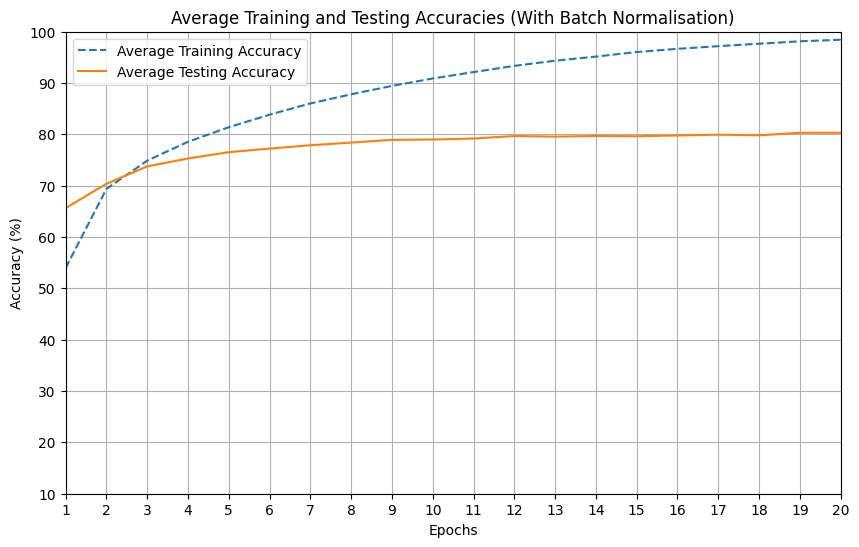

In [ ]:
learning_rate = 0.001
batch_normalisation_train_results2 = batch_normalisation_results2['train_acc']
batch_normalisation_val_results2 = batch_normalisation_results2['val_acc']

plt.figure(figsize=(10, 6))
plt.plot(epochs, batch_normalisation_train_results2, label='Average Training Accuracy', linestyle='--')
plt.plot(epochs, batch_normalisation_val_results2, label='Average Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Average Training and Testing Accuracies (With Batch Normalisation)')
plt.legend()
plt.grid(True)
plt.ylim(10, 100)
plt.yticks(np.arange(10, 101, 10))
plt.xlim(1, 20)
plt.xticks(range(1, 21))
plt.show()

# Conclusions and Discussion (instructions) - 25 MARKS <ignore>
In this section, you are expected to:
* briefly summarise and describe the conclusions from your experiments (8 MARKS).
* discuss whether or not your results are expected, providing scientific reasons (8 MARKS).
* discuss two or more alternative/additional methods that may enhance your model, with scientific reasons (4 MARKS).
* Reference two or more relevant academic publications that support your discussion. (4 MARKS)

Based on the first experiment's results, a high learning rate increased validation accuracy over time but it also led to rapid training accuracy increase after certain number of epochs, causing overfitting and poor generalisability. On the other hand, having a low learning rate prevented the model to learn adequately, resulting in low accuracy. This paper [19], which investigated the effects of different learning rate strategies, like cyclical and step decay, on optimising model performance in the CIFAR-10 dataset helped decide which scheduler strategy to use. Starting with a high learning rate and reducing it at each specified step with a “StepLR” scheduler was expected to improve both generalisability and accuracy, but while it improved generalisability, it also led to a slight drop in accuracy. In the second experiment’s first part, adding dropout to fully connected layers slightly decreased training accuracy but better generalisability. While very low dropout had little effect, very high rates highly restricted learning caused accuracy to decrease. The optimal average dropout rate positively affected generalisability by both not reducing accuracy much and by decreasing the gap. The second part of the experiment showed that freezing convolutional layers reduced accuracy as the model could not learn new features and relied on existing ones for classification. However, the optimal dropout rate from the first part of the experiment ensured good generalisability and consistent accuracies compared the zero-dropout rate. This paper [20], which investigated the effects of dropout rates on the CIFAR-10 dataset, particularly when applied to max-pooling and fully connected layers, significantly improved model generalisation, supporting the results obtained. Since recording gradients was not implemented in this project, only the batch normalisation from the fourth part of the third experiment was conducted. Batch normalisation caused model to converge faster and initially increased accuracy but led to significant overfitting, thus poor generalisation, similar to the effects of high learning rates in the first experiment. In this project, to get the expected results from the experiments, scopes mentioned in the briefs of experiments were not exceeded. If it had gone out of scope, for example, using a modified model with dropout in the first and third experiments could have prevented overfitting and allowed for higher accuracy and generalisability with a scheduler starting from a higher learning rate and batch normalisation. Additionally, instead of using the computationally slower SGD, Adam could have been used for faster, more efficient model performance due to already prevented overfitting by previous methods. In the first experiment, more extensive testing could have fine-tuned scheduler parameters for improved accuracy and efficiency, but computational costs and time constraints hindered this. More pre-processing on the CIFAR-10 dataset could also have resulted in better overall performance across experiments. In conclusion, these experiments helped understanding of various training strategies and techniques, and demonstrated how they influence the performance of CNN models for image classification. The information obtained from the results provided insight about when and how these methods should be used to improve accuracy, generalisability, and efficiency. Additionally provided guidance on the strategic application of these techniques to address specific challenges and problems encountered during model training.

# References (instructions) <ignore>
Use the cell below to add your references. A good format to use for references is like this:

[AB Name], [CD Name], [EF Name] ([year]), [Article title], [Journal/Conference Name] [volume], [page numbers] or [article number] or [doi]

Some examples:

JEM Bennett, A Phillipides, T Nowotny (2021), Learning with reinforcement prediction errors in a model of the Drosophila mushroom body, Nat. Comms 12:2569, doi: 10.1038/s41467-021-22592-4

SO Kaba, AK Mondal, Y Zhang, Y Bengio, S Ravanbakhsh (2023), Proc. 40th Int. Conf. Machine Learning, 15546-15566

# References <ignore>

[1] Y.-c. Wu and J.-w. Feng, “Development and application of artificial neural network,” Wireless Personal Communications, vol. 102, pp. 1645–1656, 2018. [Online]. Available: https://link.springer.com/article/10.1007/s11277-017-5224-x

[2] A. Krogh, “What are artificial neural networks?” Nature biotechnology, vol. 26, no. 2, pp. 195–197, 2008. [Online]. Available: https://www.nature.com/articles/nbt1386

[3] M. Zakaria, A. Mabrouka, and S. Sarhan, “Artificial neural network: a brief overview,” neural networks, vol. 1, p. 2, 2014. [Online]. Available: https://www.ijera.com/papers/Vol4issue2/Version%201/B42010712.pdf

[4] R. Doon, T. Kumar Rawat, and S. Gautam, “Cifar-10 classification using deep convolutional neural network,” in 2018 IEEE Punecon, 2018, pp. 1–5. [Online]. Available: https://ieeexplore.ieee.org/document/8745428

[5] S. Divya, B. Adepu, and P. Kamakshi, “Image enhancement and classification of cifar-10 using convolutional neural networks,” in 2022 4th International Conference on Smart Systems and Inventive Technology (ICSSIT), 2022, pp. 1–7. [Online]. Available: https://ieeexplore.ieee.org/abstract/document/9716555

[6] R. Yamashita, M. Nishio, R. K. G. Do, and K. Togashi, “Convolutional neural networks: an overview and application in radiology,” Insights into imaging, vol. 9, pp. 611–629, 2018. [Online]. Available: https://link.springer.com/article/10.1007/s13244-018-0639-9

[7] Y. Abouelnaga, O. S. Ali, H. Rady, and M. Moustafa, “Cifar-10: Knn-based ensemble of classifiers,” in 2016 International Conference on Computational Sci- ence and Computational Intelligence (CSCI), 2016, pp. 1192–1195. [Online]. Available: https://ieeexplore.ieee.org/abstract/document/7881518

[8] B. Recht, R. Roelofs, L. Schmidt, and V. Shankar, “Do cifar-10 classifiers generalize to cifar-10?” arXiv preprint arXiv:1806.00451, 2018. [Online]. Available: https://arxiv.org/abs/1806.00451

[9] P. Chlap, H. Min, N. Vandenberg, J. Dowling, L. Holloway, and A. Haworth, “A review of medical image data augmentation techniques for deep learning applications,” Journal of Medical Imaging and Radiation Oncology, vol. 65, no. 5, pp. 545–563, 2021. [Online]. Available: https://onlinelibrary.wiley.com/doi/full/10.1111/1754-9485.13261

[10] K. Lee, S. H. Sung, D.-h. Kim, and S.-h. Park, “Verification of normalization effects through comparison of cnn models,” in 2019 International Conference on Mul- timedia Analysis and Pattern Recognition (MAPR), 2019, pp. 1–5. [Online]. Available: https://ieeexplore.ieee.org/abstract/document/8743531

[11] B. Recht, R. Roelofs, L. Schmidt, and V. Shankar, “Do CIFAR-10 classifiers generalize to cifar- 10?” CoRR, vol. abs/1806.00451, 2018. [Online]. Available: http://arxiv.org/abs/1806.00451

[12] J. Gu, Z. Wang, J. Kuen, L. Ma, A. Shahroudy, B. Shuai, T. Liu, X. Wang, G. Wang, J. Cai, and T. Chen, “Recent advances in convolutional neural net- works,” Pattern Recognition, vol. 77, pp. 354–377, 2018. [Online]. Available: https://www.sciencedirect.com/science/article/pii/S0031320317304120

[13] S. Sharma, S. Sharma, and A. Athaiya, “Activation functions in neural networks,” Towards Data Sci, vol. 6, no. 12, pp. 310–316, 2017. [Online]. Available: https://www.ijeast.com/papers/310-316,Tesma412,IJEAST.pdf

[14] Z. Li, F. Liu, W. Yang, S. Peng, and J. Zhou, “A survey of convolutional neural networks: Analysis, applications, and prospects,” IEEE Transactions on Neural Networks and Learning Systems, vol. 33, no. 12, pp. 6999–7019, 2022. [Online]. Available: https://ieeexplore.ieee.org/document/9451544

[15] G. Petmezas, G.-A. Cheimariotis, L. Stefanopoulos, B. Rocha, R. P. Paiva, A. K. Katsaggelos, and N. Maglaveras, “Automated lung sound classification using a hybrid cnn-lstm network and focal loss function,” Sensors, vol. 22, no. 3, 2022. [Online]. Available: https://www.mdpi.com/1424-8220/22/3/1232

[16] M. Yaqub, J. Feng, M. S. Zia, K. Arshid, K. Jia, Z. U. Rehman, and A. Mehmood, “State-of-the- art cnn optimizer for brain tumor segmentation in magnetic resonance images,” Brain Sciences, vol. 10, no. 7, 2020. [Online]. Available: https://www.mdpi.com/2076-3425/10/7/427

[17] U. Nandi, A. Ghorai, M. M. Singh, C. Changdar, S. Bhakta, and R. Kumar Pal, “Indian sign language alphabet recognition system using cnn with diffgrad optimizer and stochastic pooling,” Multimedia Tools and Applications, vol. 82, no. 7, pp. 9627–9648, 2023. [Online]. Available: https://link.springer.com/article/10.1007/s11042-021-11595-4

[18] D. Menaka and S. G. Vaidyanathan, “Chromenet: A cnn architecture with compar- ison of optimizers for classification of human chromosome images,” Multidimensional Systems and Signal Processing, vol. 33, no. 3, pp. 747–768, 2022. [Online]. Available: https://link.springer.com/article/10.1007/s11045-022-00819-x

[19] J. Konar, P. Khandelwal, and R. Tripathi, “Comparison of various learning rate scheduling techniques on convolutional neural network,” in 2020 IEEE International Students’ Conference on Electrical,Electronics and Computer Science (SCEECS), 2020, pp. 1–5. [Online]. Available: https://ieeexplore.ieee.org/abstract/document/9087167

[20] H. Wu and X. Gu, “Towards dropout training for convolutional neural networks,” Neural Networks, vol. 71, pp. 1–10, 2015. [Online]. Available: https://www.sciencedirect.com/science/article/pii/S08936080150014469

Image References

[21] K. E. Koech, “The basics of neural networks: Neural network series part 1,” 2022. [Online]. Available: https://towardsdatascience.com/the-basics-of-neural-networks-neural-network-series- part-1-4419e343b2b

[22] S. Balaji, “Binary image classifier cnn using tensorflow,” 2020. [Online]. Available: https://medium.com/techiepedia/binary-image-classifier-cnn-using-tensorflow-a3f5d6746697

[23] A. Krizhevsky, “Cifar-10 and cifar-100 datasets,” University of Toronto, 2009. [Online]. Available: https://www.cs.toronto.edu/kriz/cifar.html

[24]  P. Ganesh, “Types of convolution kernels: Simplified,” 2019. [Online]. Available: https://towardsdatascience.com/types-of-convolution-kernels-simplified-f040cb307c37

[25] S. Sharma, “Activation functions in neural networks,” 2017. [Online]. Available: https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6